# 数据分析

In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scienceplots
import joblib
from pathlib import Path

plt.style.use(["science", "notebook", "no-latex"])

PROCESSED_DATA_DIR = Path("../dataset/processed")

## 读取数据集

In [29]:
inputs = joblib.load(PROCESSED_DATA_DIR / "inputs.joblib")
target = joblib.load(PROCESSED_DATA_DIR / "target.joblib")
preprocessor = joblib.load(PROCESSED_DATA_DIR / "preprocessor.joblib")
df = pd.concat([inputs, target], axis=1)
df.head()

,location,employment_type,industry,department,telecommuting,has_company_logo,has_questions,required_experience,required_education,function,text,salary,text_length,fraudulent
0,West Jeffrey,Internship,IT,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,mental health nurse arm drive court sure vote ...,77746.0,187,1
1,Lake Meredithberg,Part-Time,Finance,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,conference centre manager government bed tax t...,73288.0,216,1
2,Lake Cathybury,Part-Time,IT,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,engineer land member discuss follow way nation...,75406.5,196,1
3,South Matthewstad,Full-Time,Education,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,forest woodland manager house wait approach fa...,102904.5,207,1
4,East Rhondafurt,Temporary,Retail,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,production designer theatre television film ca...,73597.5,243,1


## 数据分析

### 单变量分析

分析不同的empoloyment_type的占比情况

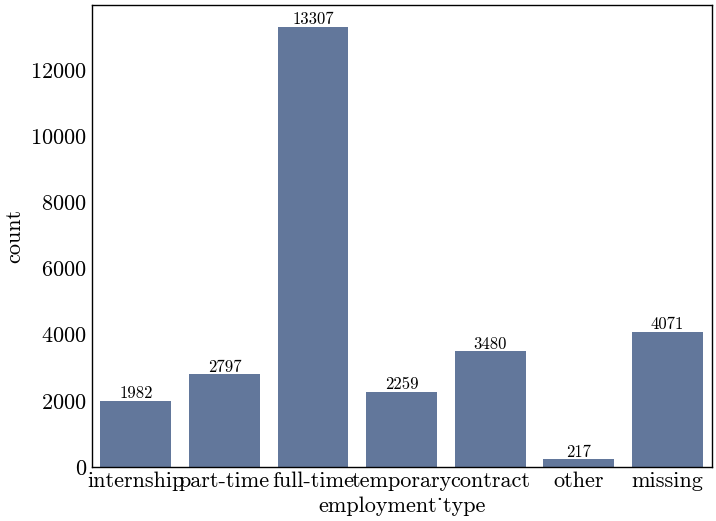

In [4]:
df['employment_type'] = df['employment_type'].str.lower()
ax = sns.countplot(df, x="employment_type", color="#5975A4")
ax.bar_label(ax.containers[0], fontsize=12);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
plt.show()

### 多变量分析

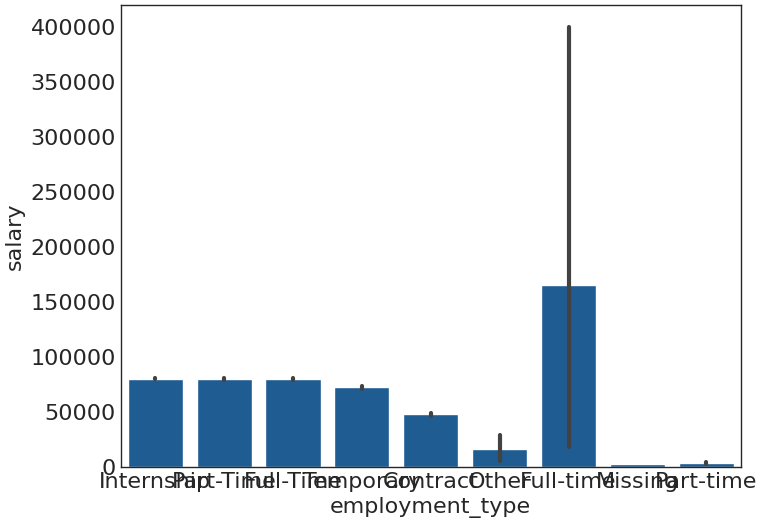

In [36]:
sns.barplot(df, x="employment_type", y="salary")
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
plt.show()

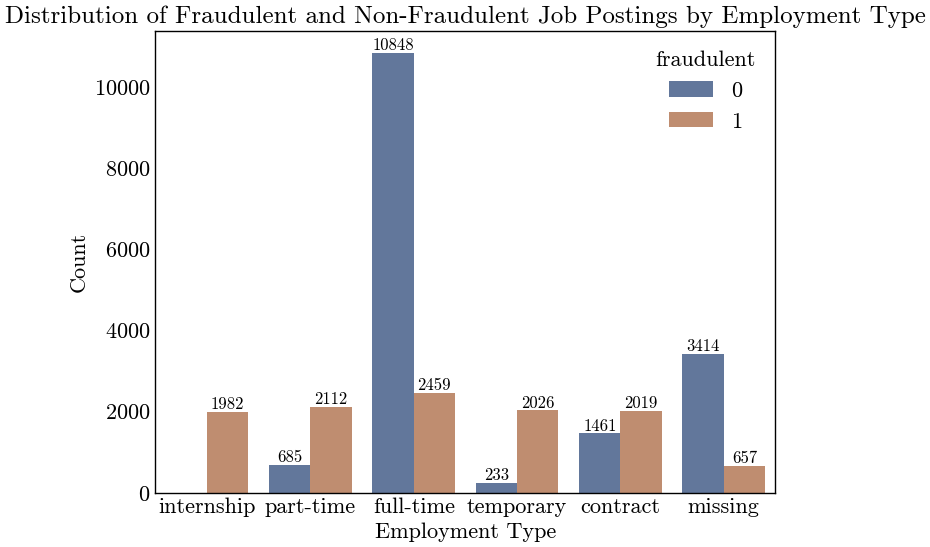

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
selected_employment_types = [
    "full-time",
    "part-time",
    "contract",
    "temporary",
    "internship",
    "missing",
]

filtered_df = df[df["employment_type"].isin(selected_employment_types)]
g = sns.countplot(
    data=filtered_df,
    x="employment_type",
    hue="fraudulent",
    width=0.8,
    palette=["#5975A4", "#CC8963"],
)
g.bar_label(g.containers[0], fontsize=12)
g.bar_label(g.containers[1], fontsize=12)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)
ax.set_title(
    "Distribution of Fraudulent and Non-Fraudulent Job Postings by Employment Type",
    fontsize=18,
)
ax.set_xlabel("Employment Type", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
plt.show()

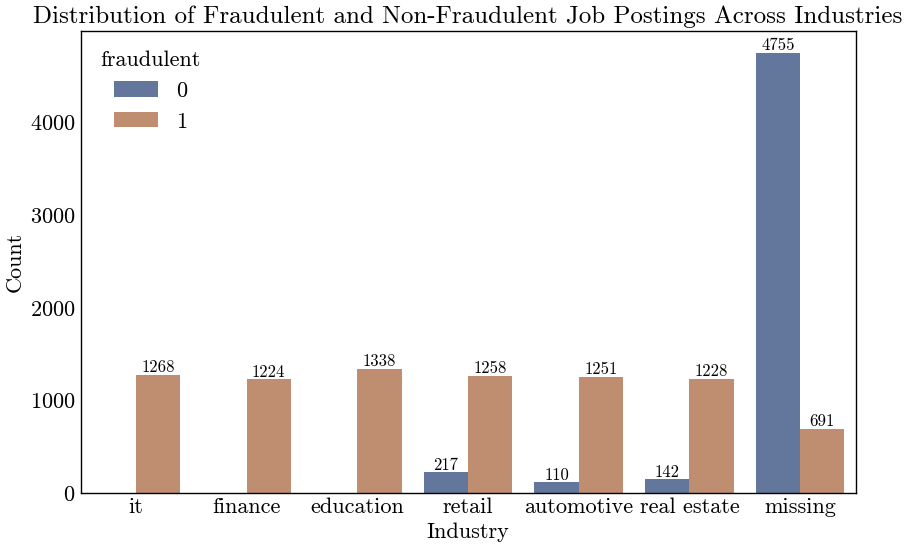

In [18]:
df["industry"] = df["industry"].str.lower()

top_industries = [
    "it",
    "missing",
    "education",
    "retail",
    "finance",
    "real estate",
    "automotive",
]
filtered_df_industry = df[df["industry"].isin(top_industries)]

fig, ax = plt.subplots(figsize=(10, 6))
g = sns.countplot(
    data=filtered_df_industry,
    x="industry",
    hue="fraudulent",
    width=0.8,
    palette=["#5975A4", "#CC8963"],
    ax=ax,
)
g.bar_label(g.containers[0], fontsize=12)
g.bar_label(g.containers[1], fontsize=12)

plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)

ax.set_title(
    "Distribution of Fraudulent and Non-Fraudulent Job Postings Across Industries",
    fontsize=18,
)
ax.set_xlabel("Industry", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
plt.show()

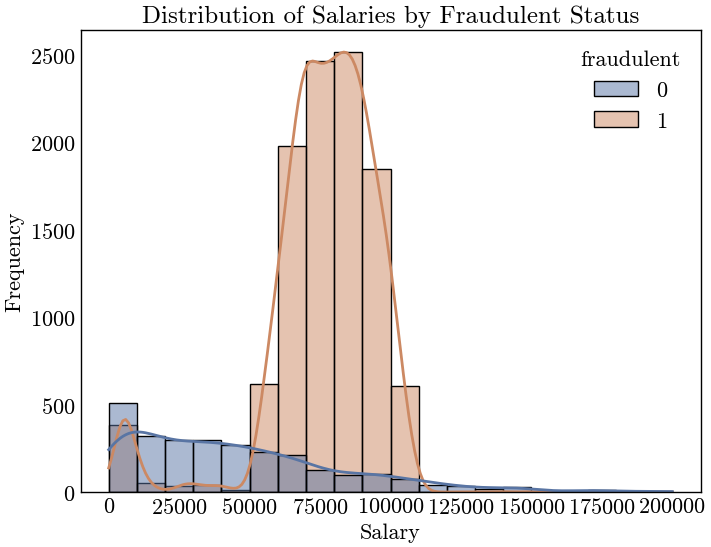

In [25]:
non_zero_salary_df = df[df["salary"] > 0].copy()

salary_threshold = 200000
non_zero_salary_df_filtered = non_zero_salary_df[
    non_zero_salary_df["salary"] <= salary_threshold
]
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    data=non_zero_salary_df_filtered,
    x="salary",
    hue="fraudulent",
    kde=True,
    ax=ax,
    bins=20,
    palette=["#5975A4", "#CC8963"],
)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)
ax.set_title(f"Distribution of Salaries by Fraudulent Status", fontsize=18)
ax.set_xlabel("Salary", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
plt.show()

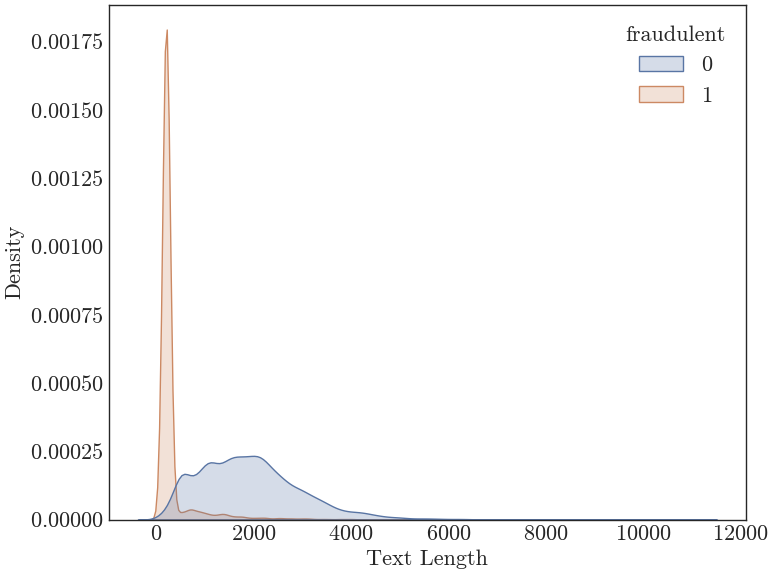

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x="text_length",
    hue="fraudulent",
    fill=True,
    palette=["#5975A4", "#CC8963"],
    ax=ax
)
plt.xlabel("Text Length", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)
plt.tight_layout()
plt.show()

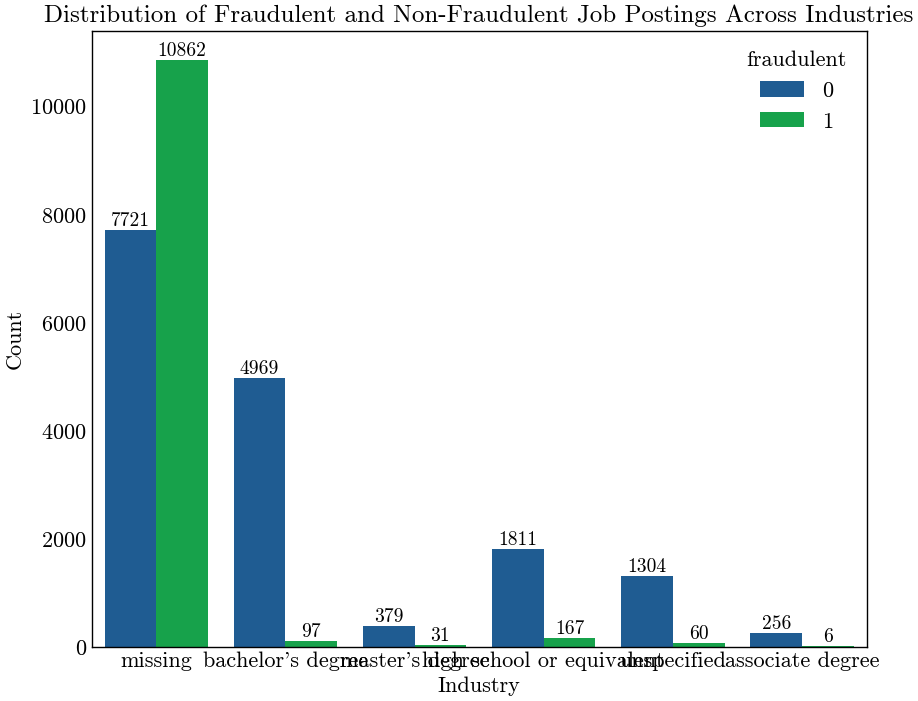

In [20]:
df["required_education"] = df["required_education"].str.lower()
education = df["required_education"].value_counts().index[:6]

df_filter = df[df["required_education"].isin(education)]
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(data=df_filter, x="required_education", hue="fraudulent", width=0.8)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 3,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=14)

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)

ax.set_title("Distribution of Fraudulent and Non-Fraudulent Job Postings Across Industries", fontsize=18)
ax.set_xlabel("Industry", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
plt.show()

In [51]:
df["required_education"] = df["required_education"].str.lower()
mapping = {
    "bachelor's degree": "bachelor",
    "master's degree": "master",
    "associate degree": "associate"
}
df["required_education"] = df["required_education"].map(mapping)
df["required_education"].value_counts()

required_education
bachelor     5066
master        410
associate     262
Name: count, dtype: int64

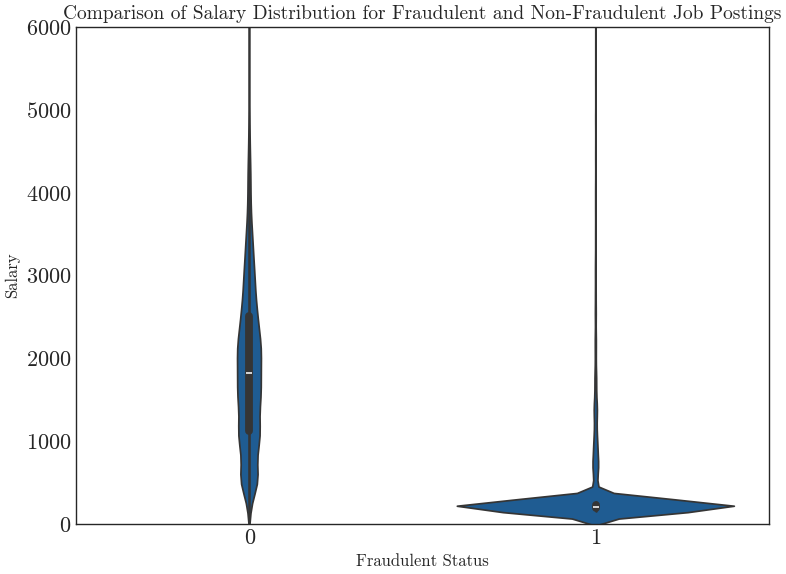

In [53]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='fraudulent', y='text_length')
plt.title('Comparison of Salary Distribution for Fraudulent and Non-Fraudulent Job Postings', fontsize=14)
plt.xlabel('Fraudulent Status', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.ylim(0, 6000)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
plt.tight_layout()
plt.show()

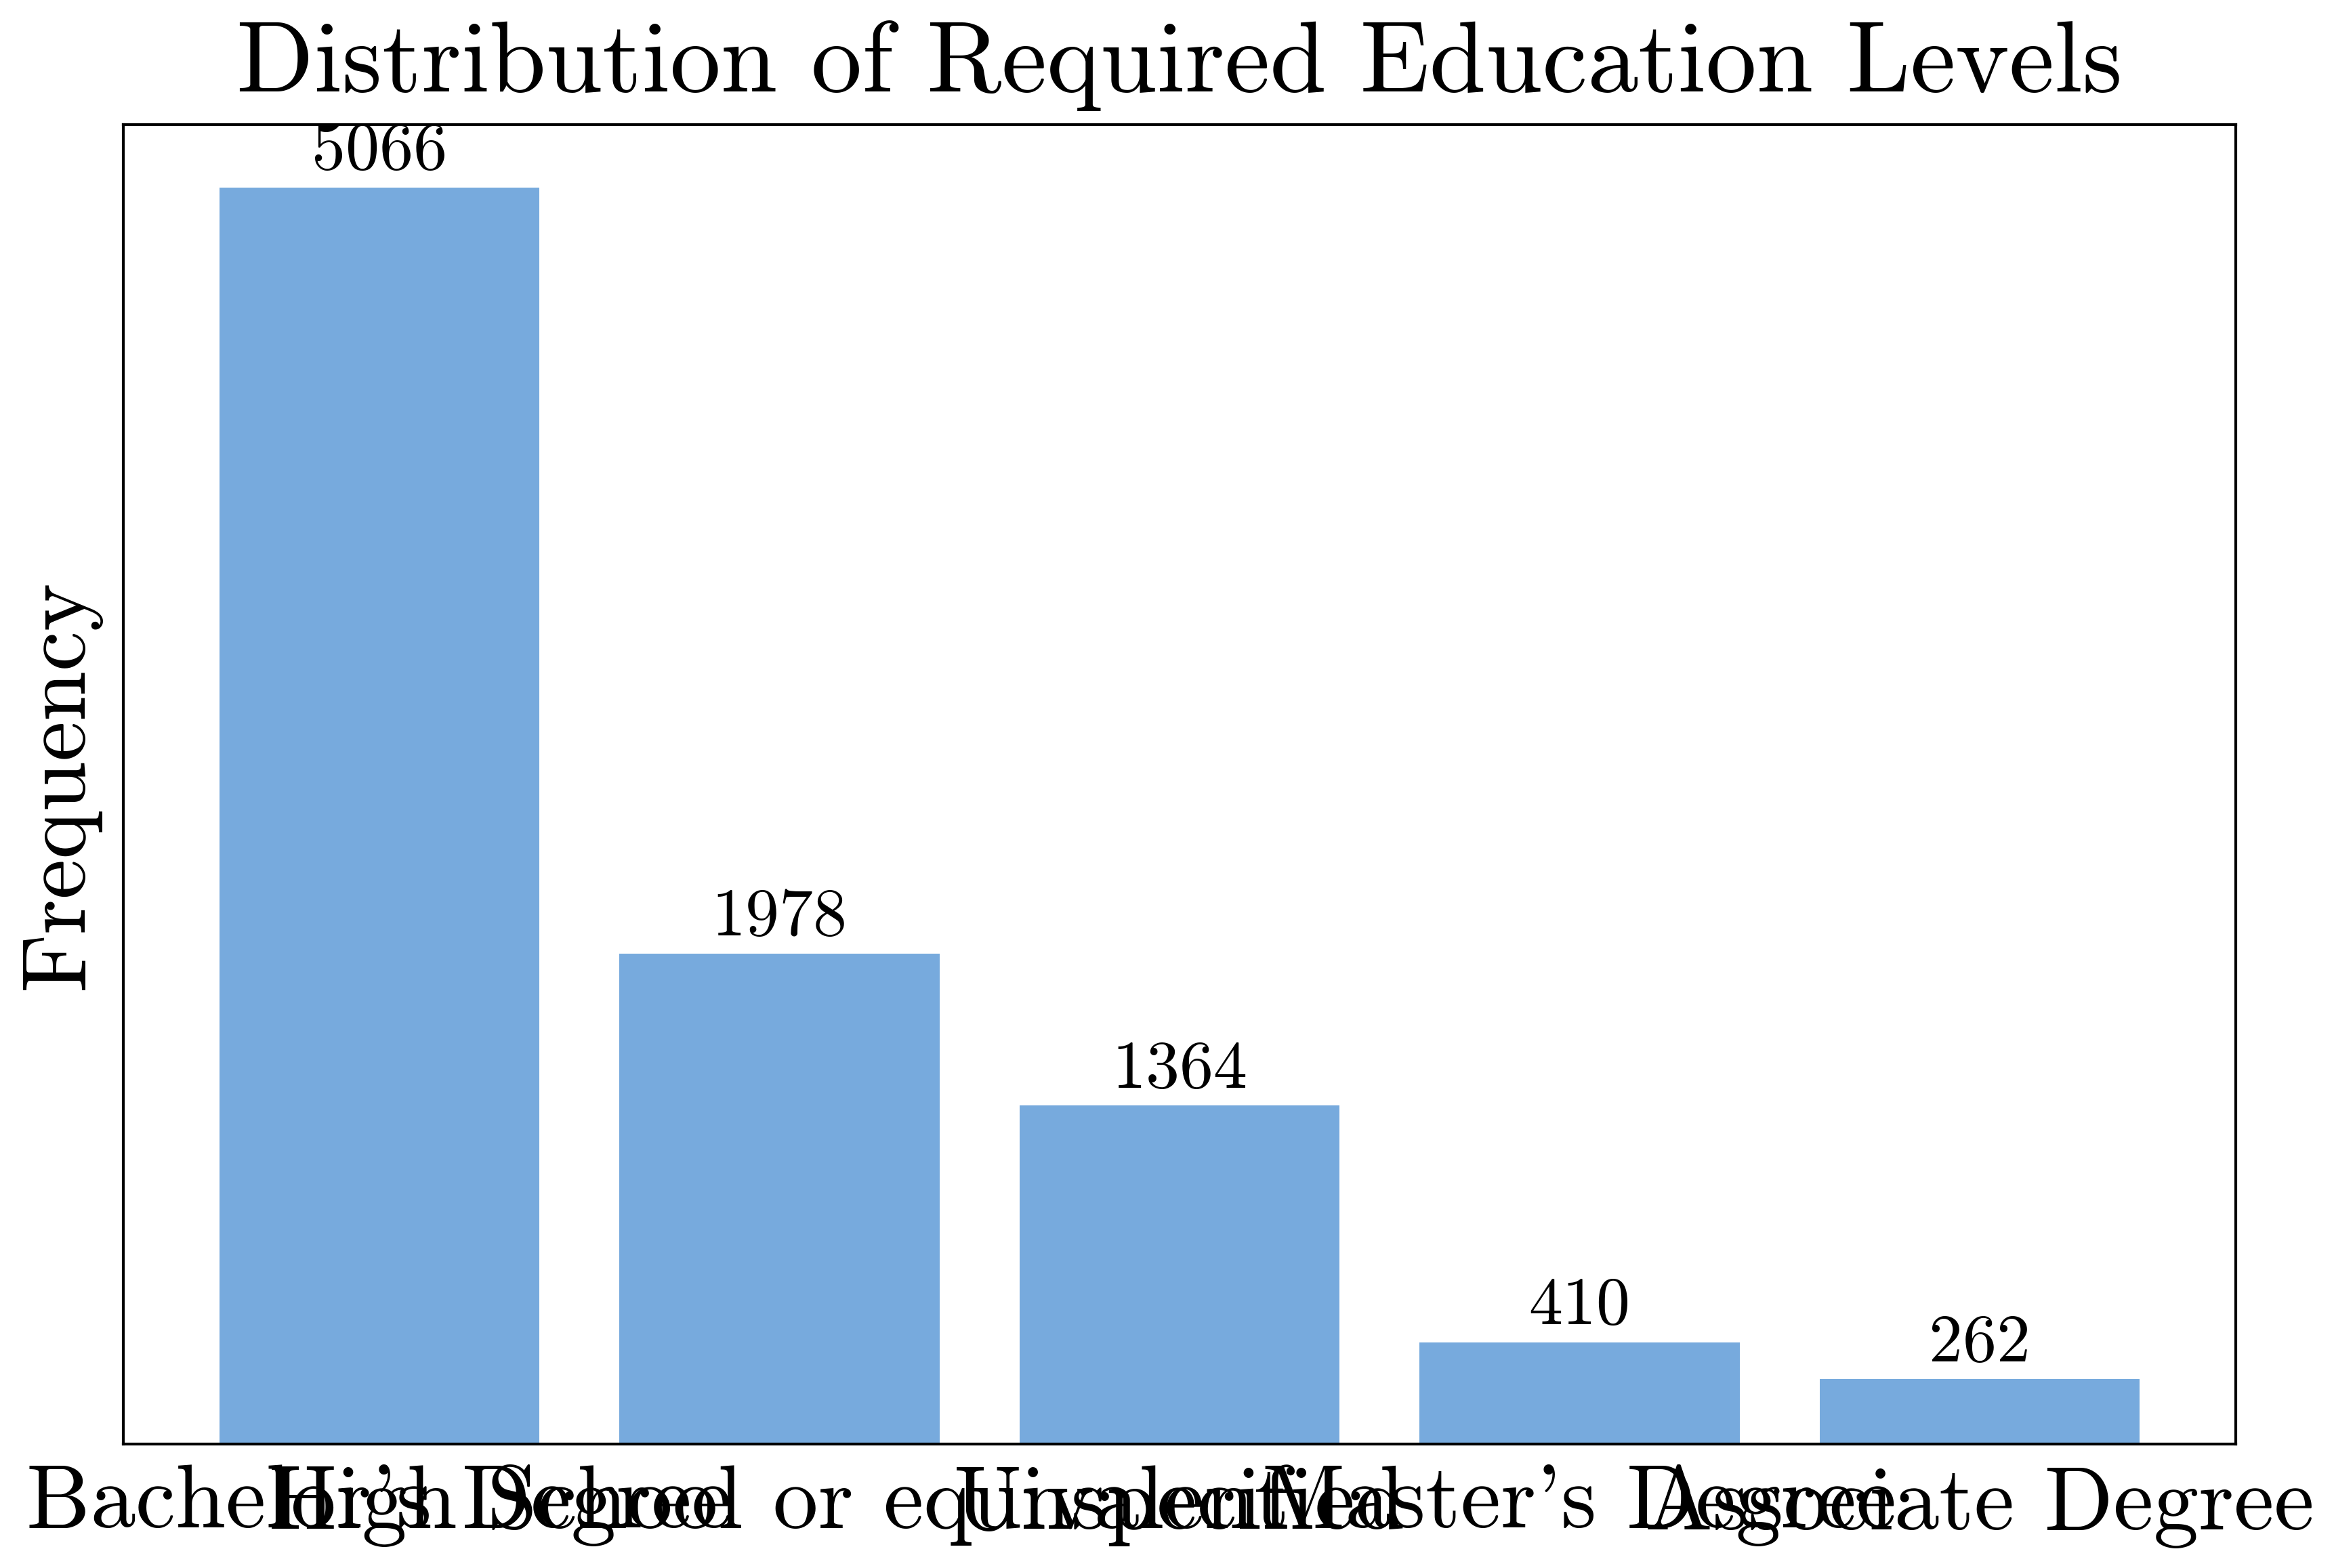

In [29]:
education = df["required_education"].value_counts()[1:6]
labels = education.index 
values = education.values

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=False)
    ax.set_title("Distribution of Required Education Levels", fontsize=18)
    ax.set_ylabel("Frequency", fontsize=16)
    plt.tight_layout()
    plt.show()

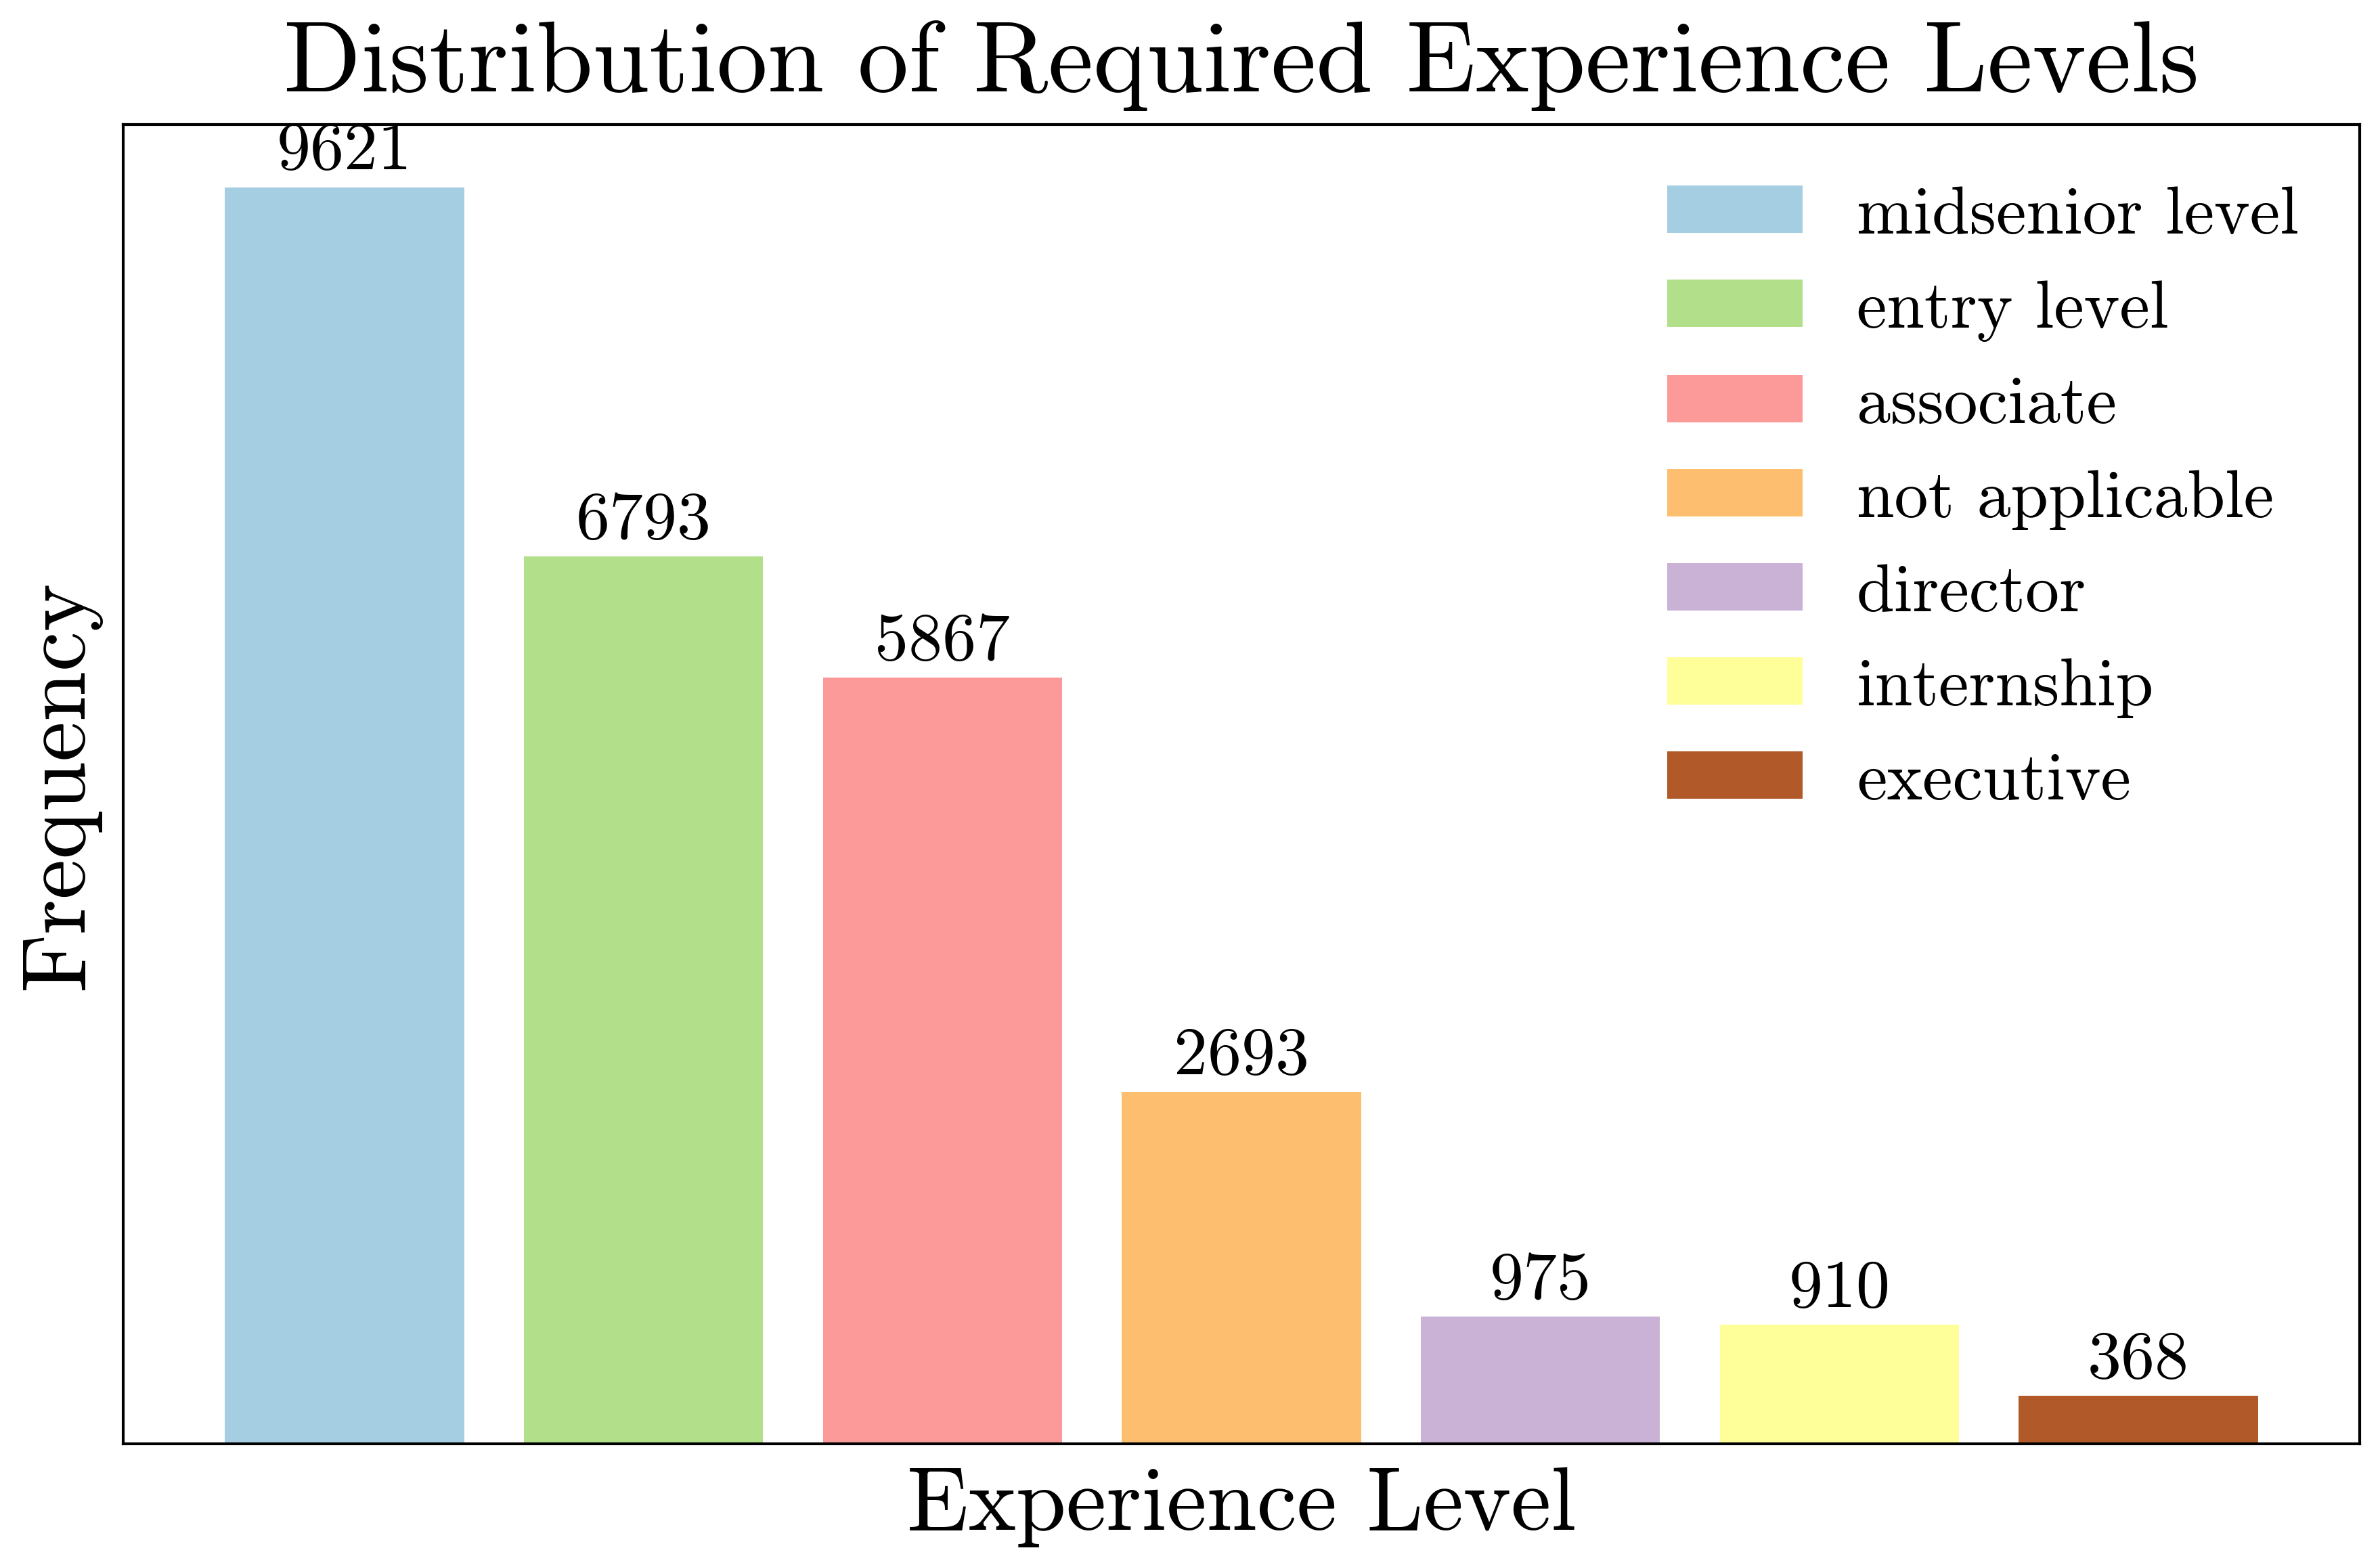

In [59]:
experience = df["required_experience"].value_counts()
labels = experience.index 
values = experience.values
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, color=colors, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.legend(bars, labels, loc="best", fontsize=12)
    ax.set_title("Distribution of Required Experience Levels", fontsize=18)
    ax.set_xlabel("Experience Level", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    plt.tight_layout()
    plt.show()

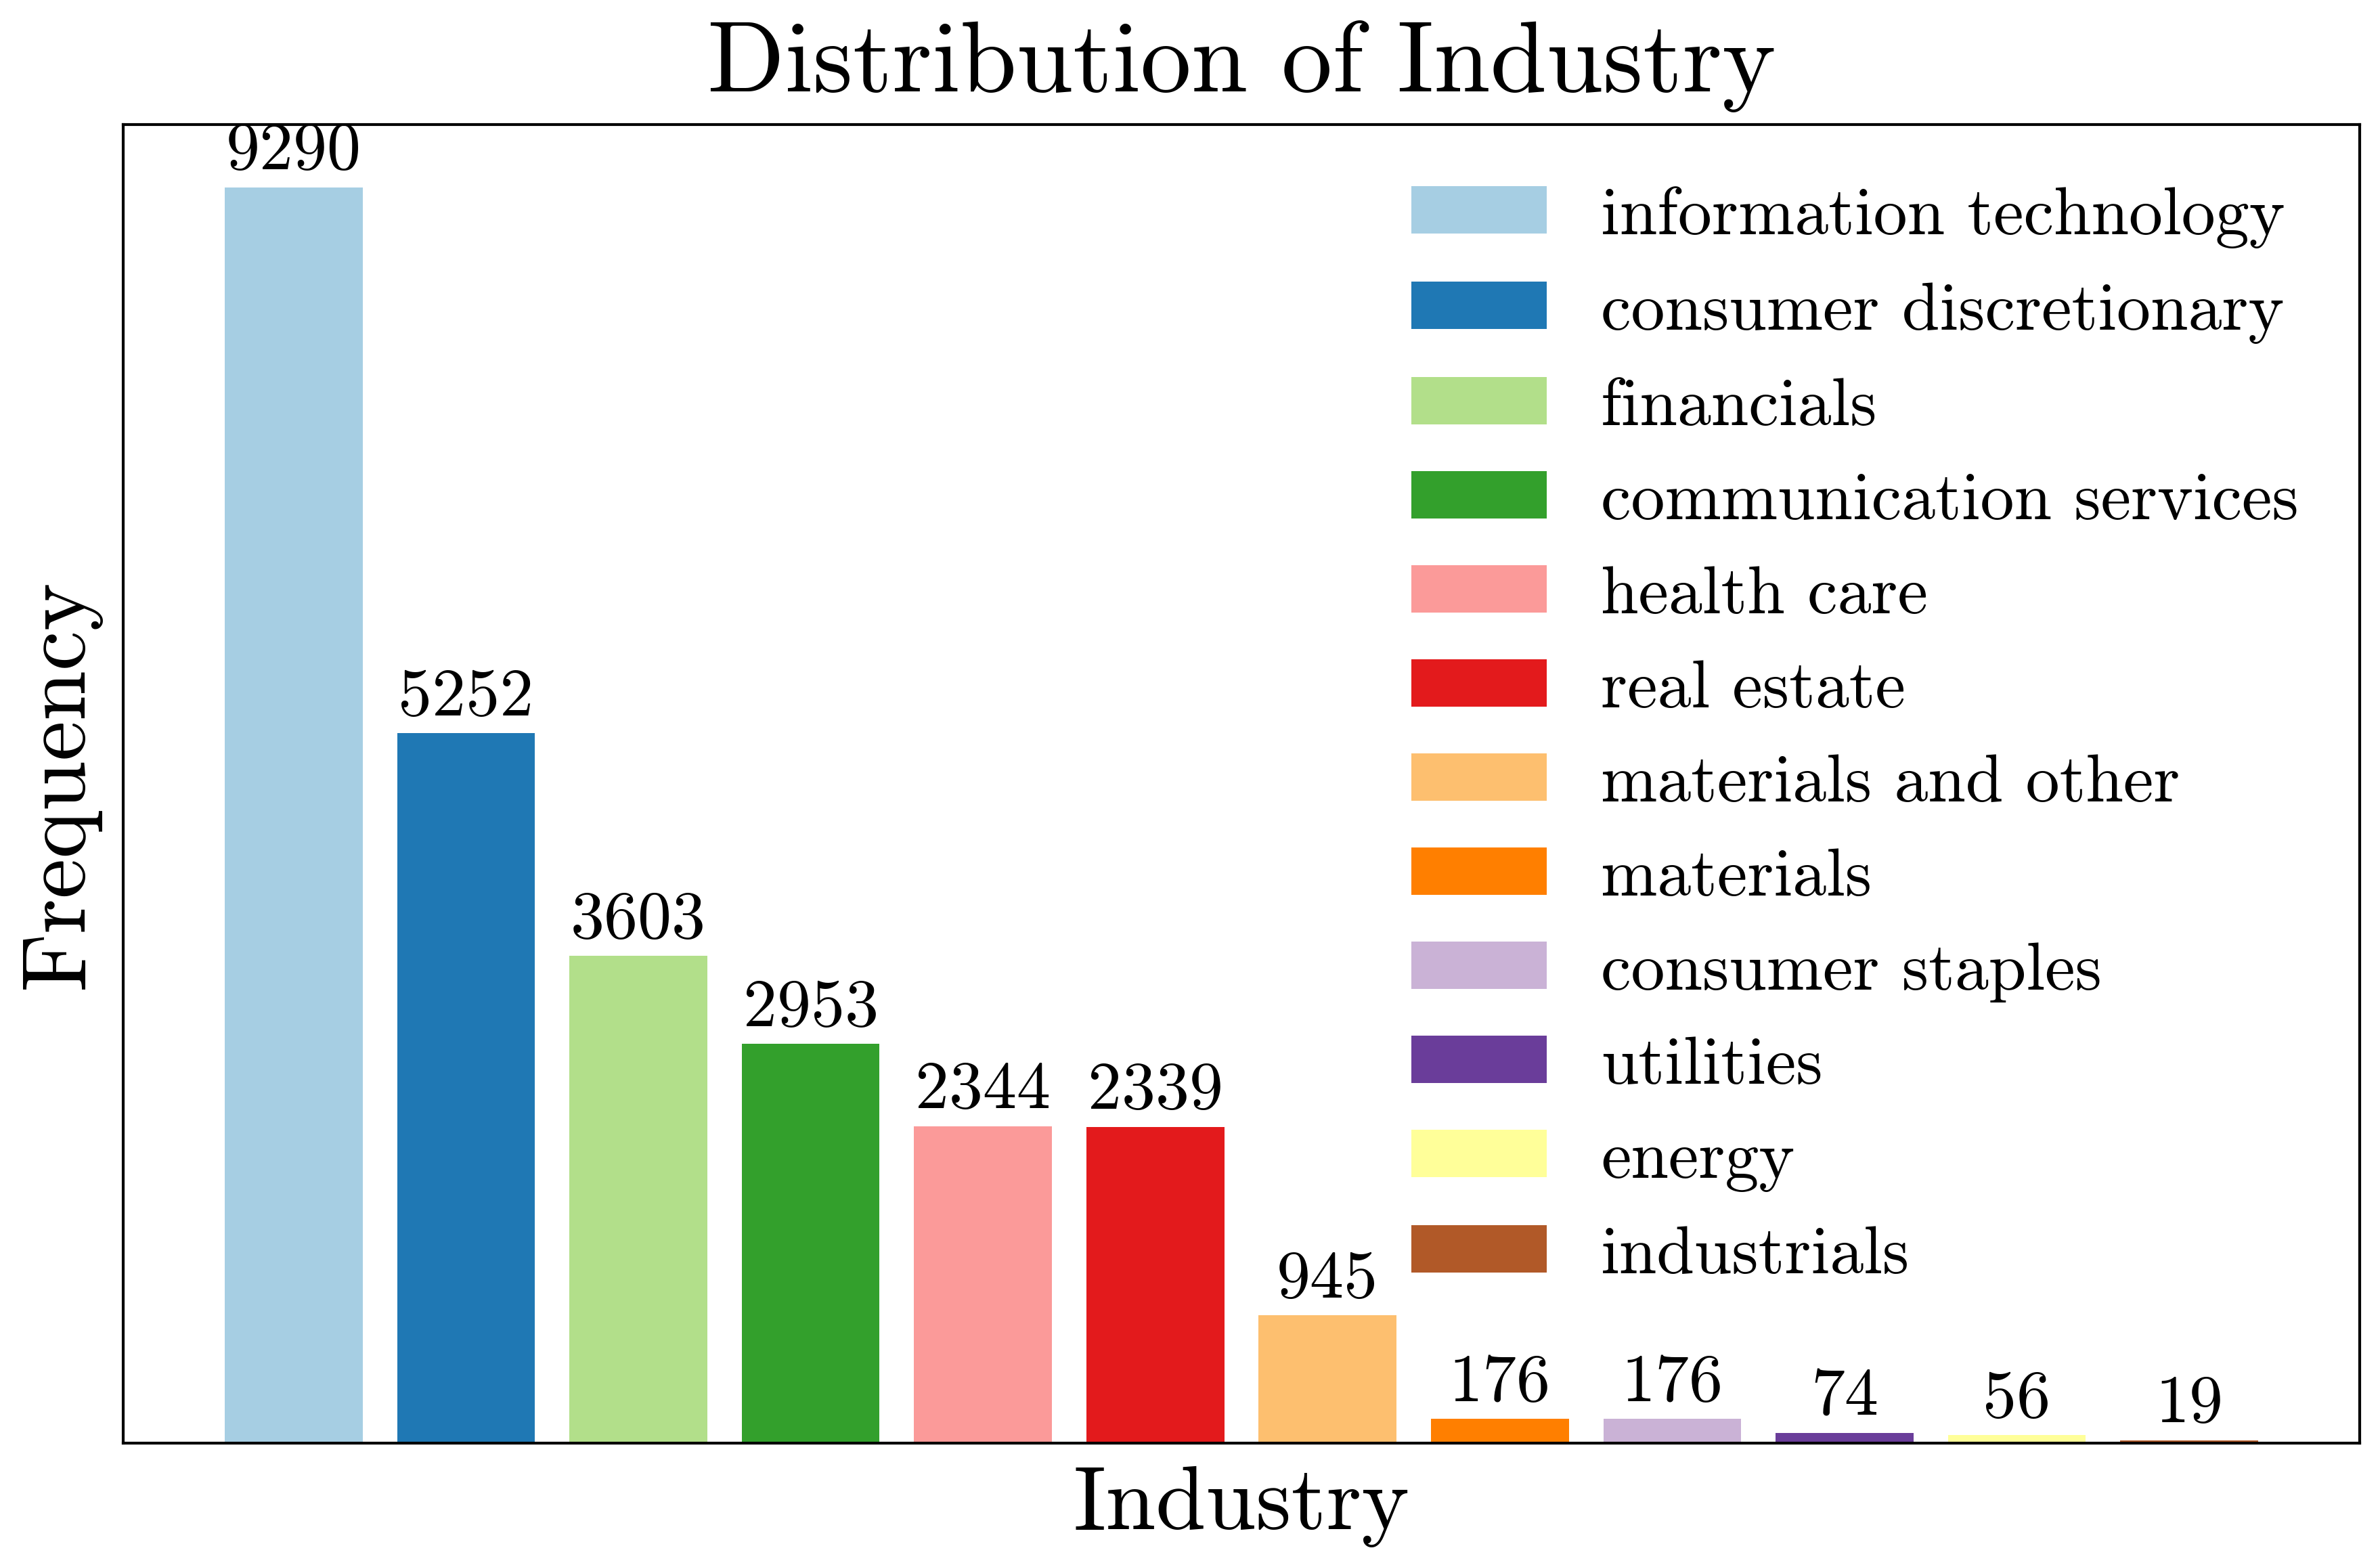

In [61]:
industry = df["industry"].value_counts()
labels = industry.index 
values = industry.values
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, color=colors, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.legend(bars, labels, loc="best", fontsize=12)
    ax.set_title("Distribution of Industry", fontsize=18)
    ax.set_xlabel("Industry", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    plt.tight_layout()
    plt.show()

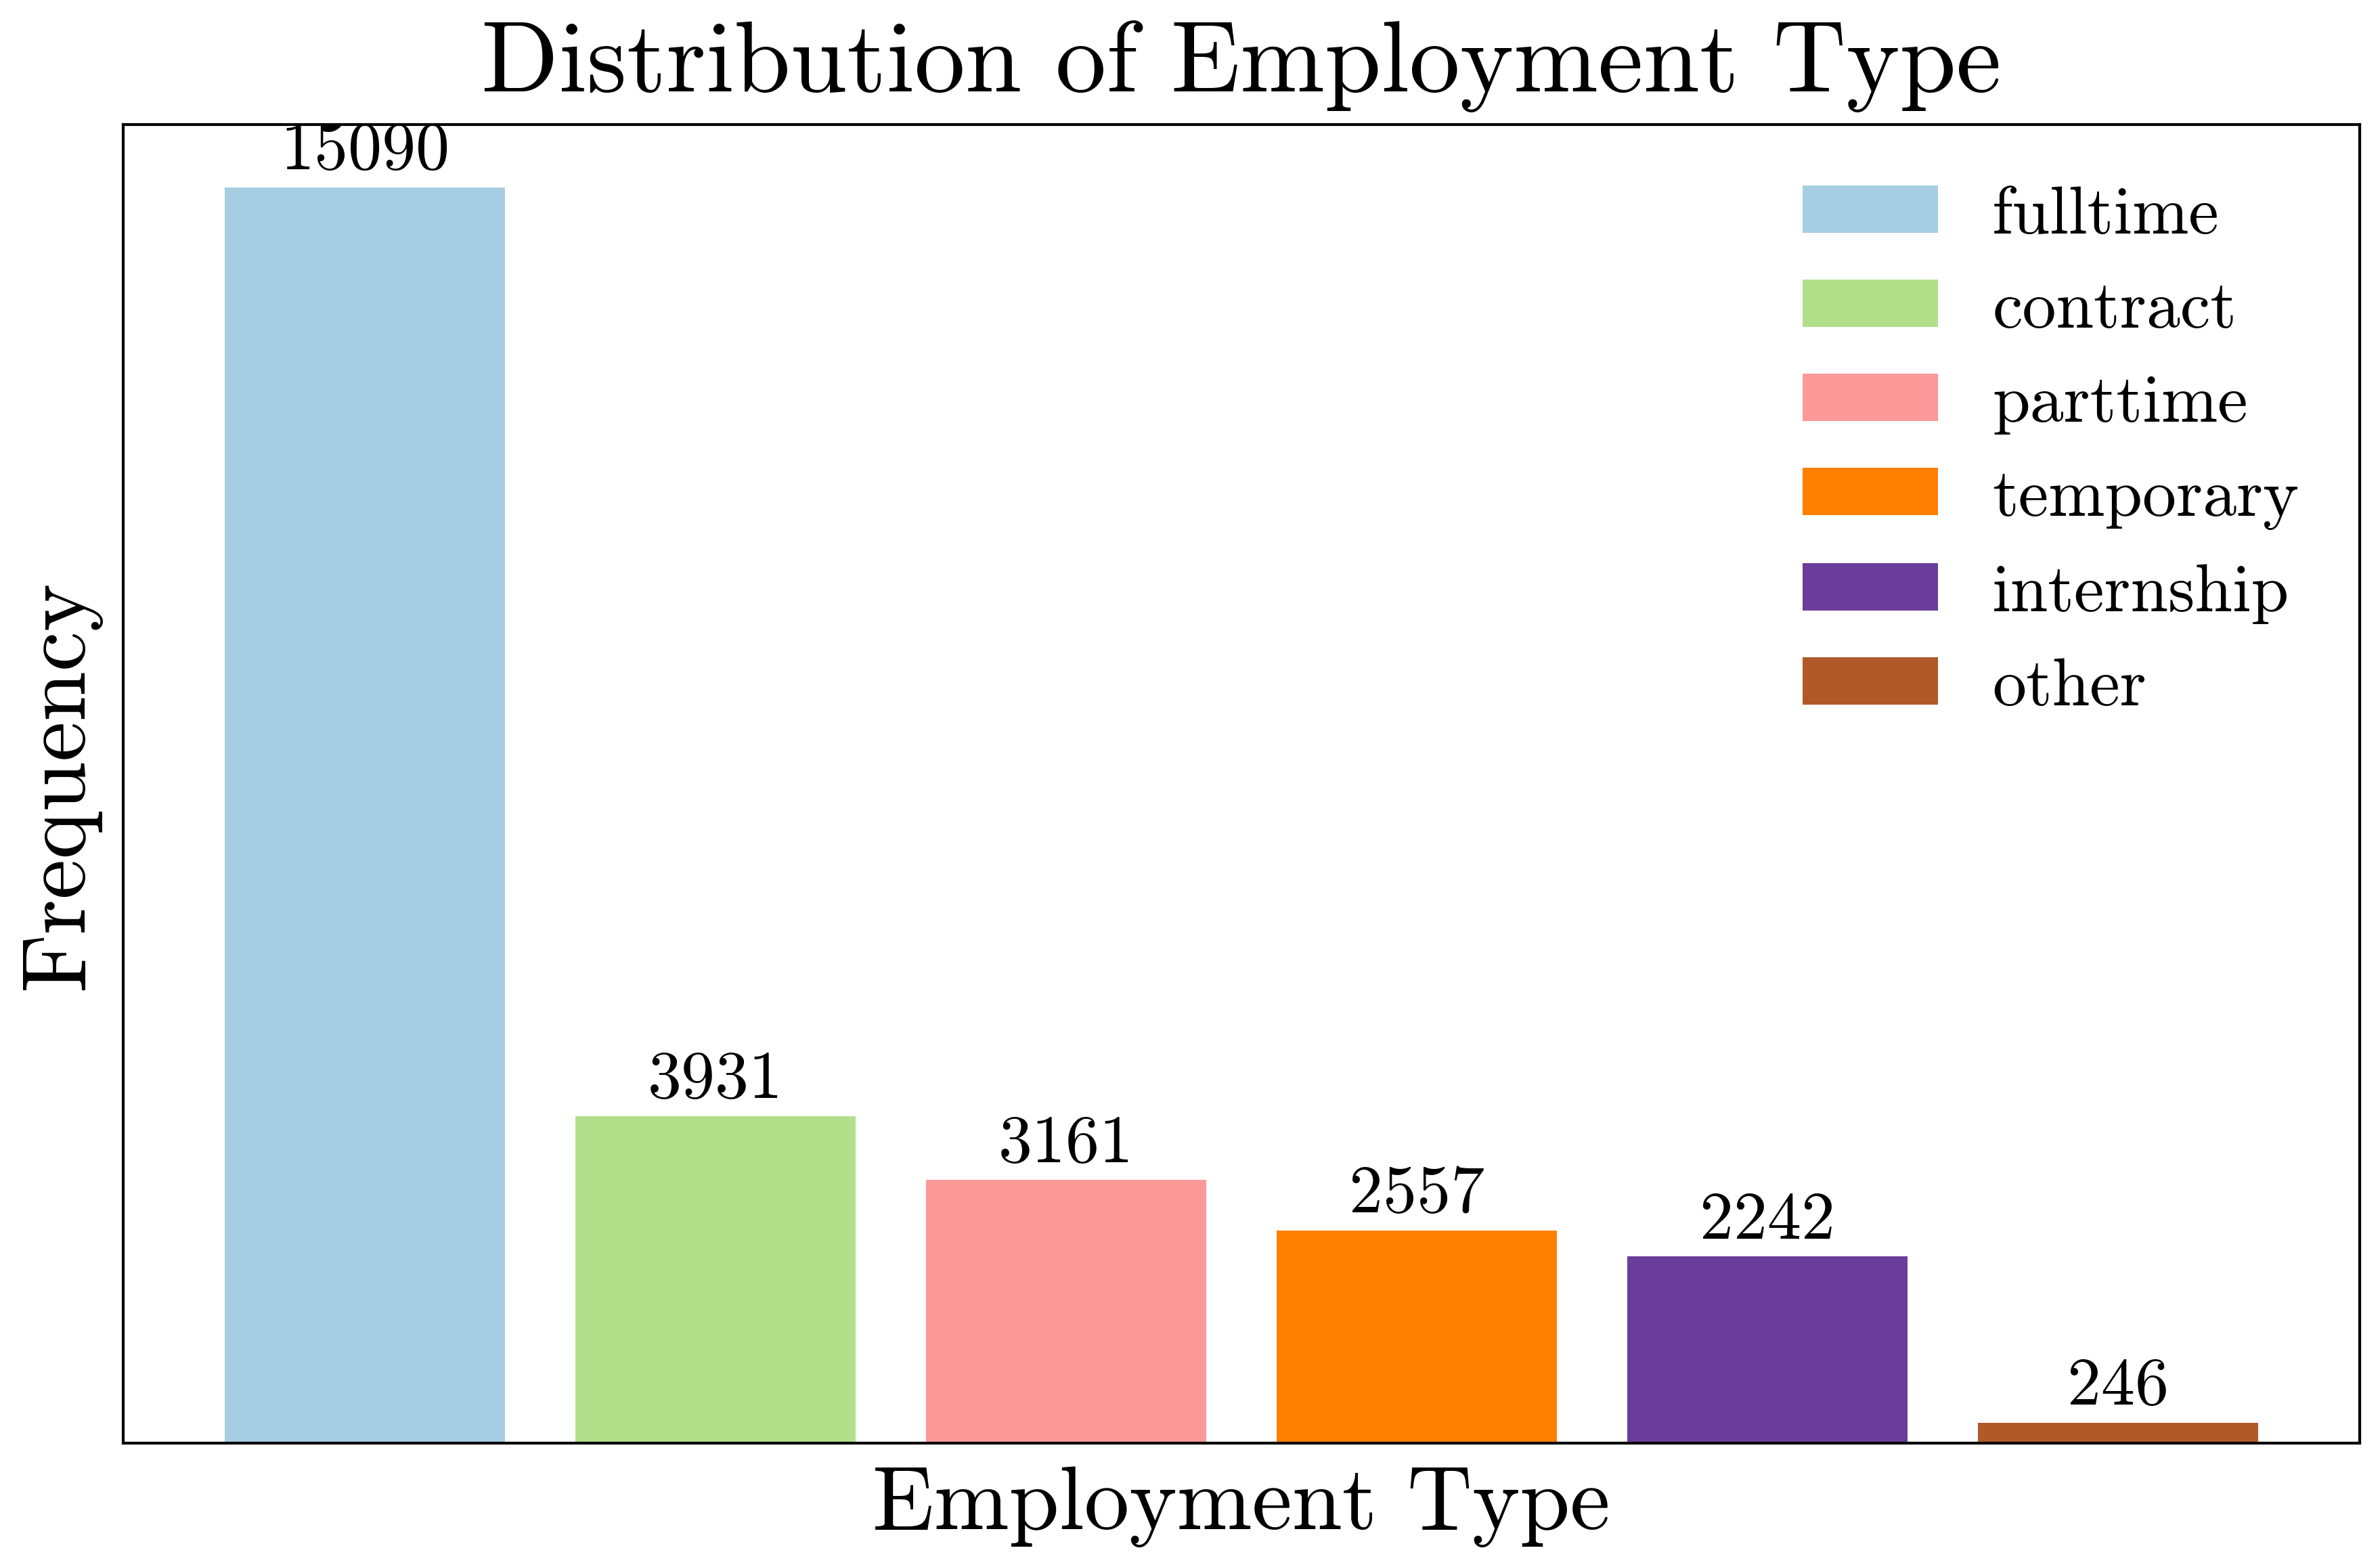

In [60]:
employment = df["employment_type"].value_counts()
labels = employment.index 
values = employment.values
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, color=colors, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.legend(bars, labels, loc="best", fontsize=12)
    ax.set_title("Distribution of Employment Type", fontsize=18)
    ax.set_xlabel("Employment Type", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    plt.tight_layout()
    plt.show()

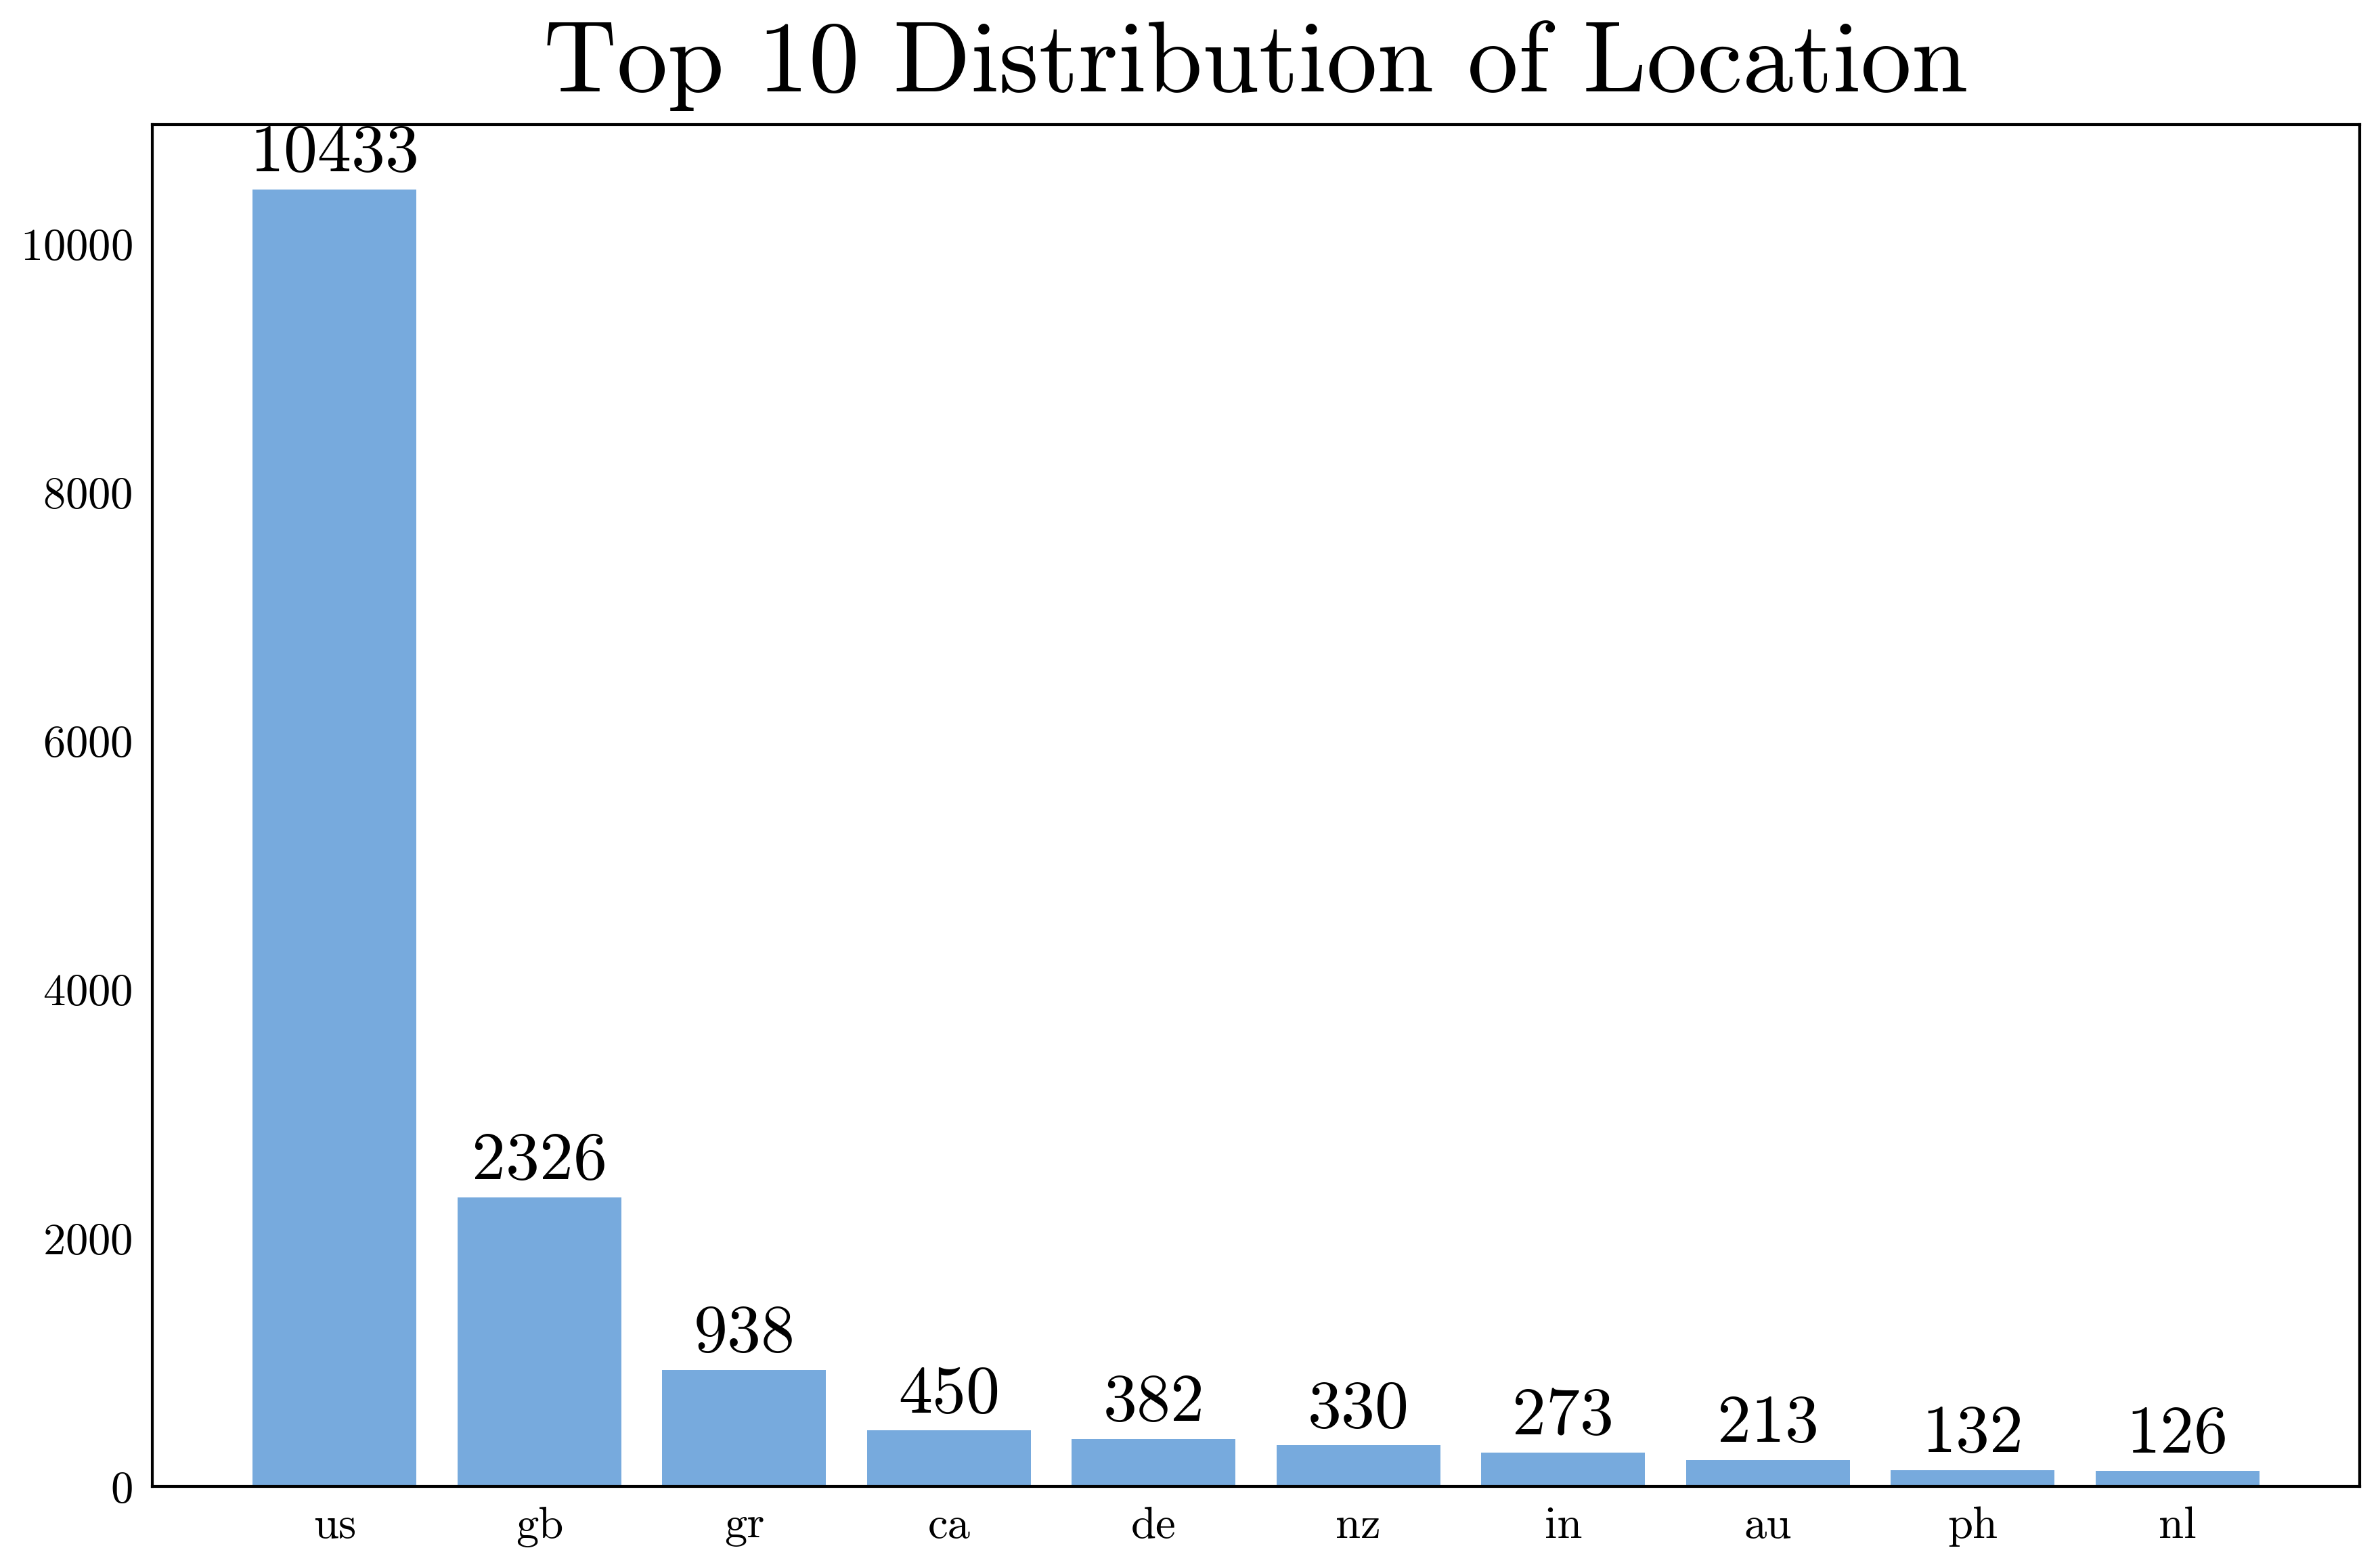

In [67]:
locations = df["location"].value_counts()[:10]
labels = locations.index 
values = locations.values

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    ax.set_title("Top 10 Distribution of Location", fontsize=18)
    plt.tight_layout()
    plt.show()

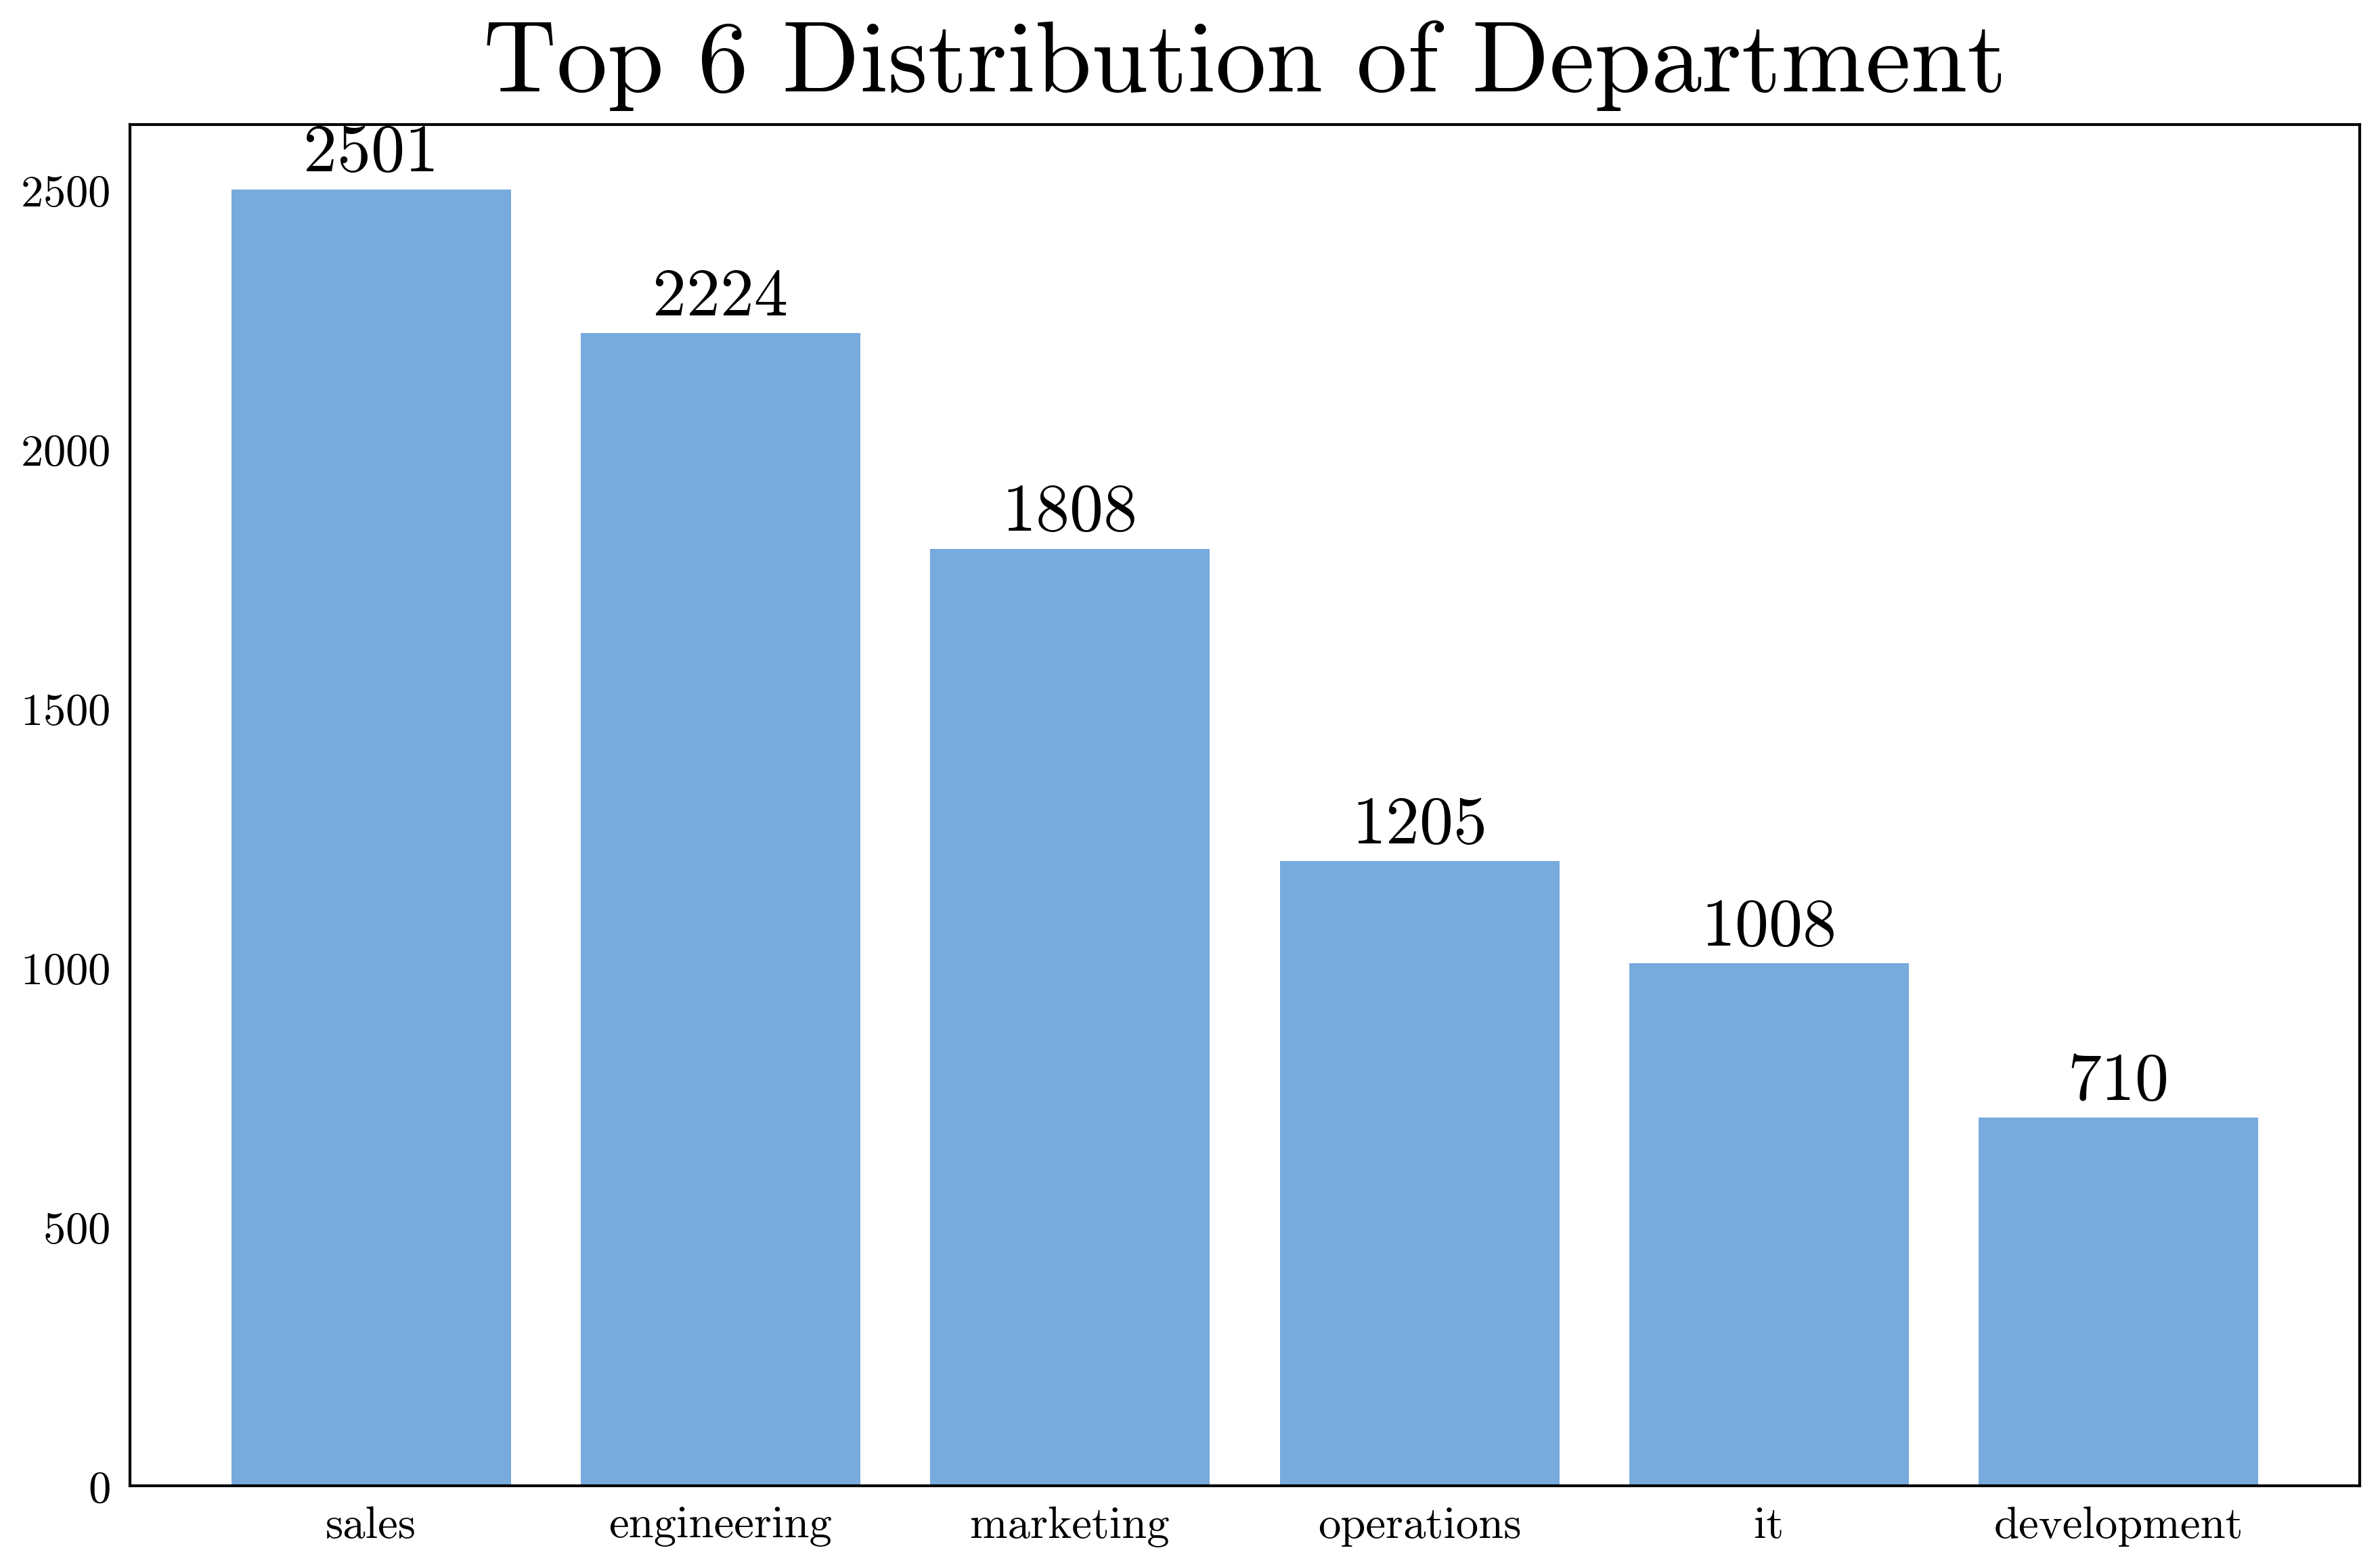

In [72]:
department = df["department"].value_counts()[:6]
labels = department.index 
values = department.values

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    ax.set_title("Top 6 Distribution of Department", fontsize=18)
    plt.tight_layout()
    plt.show()

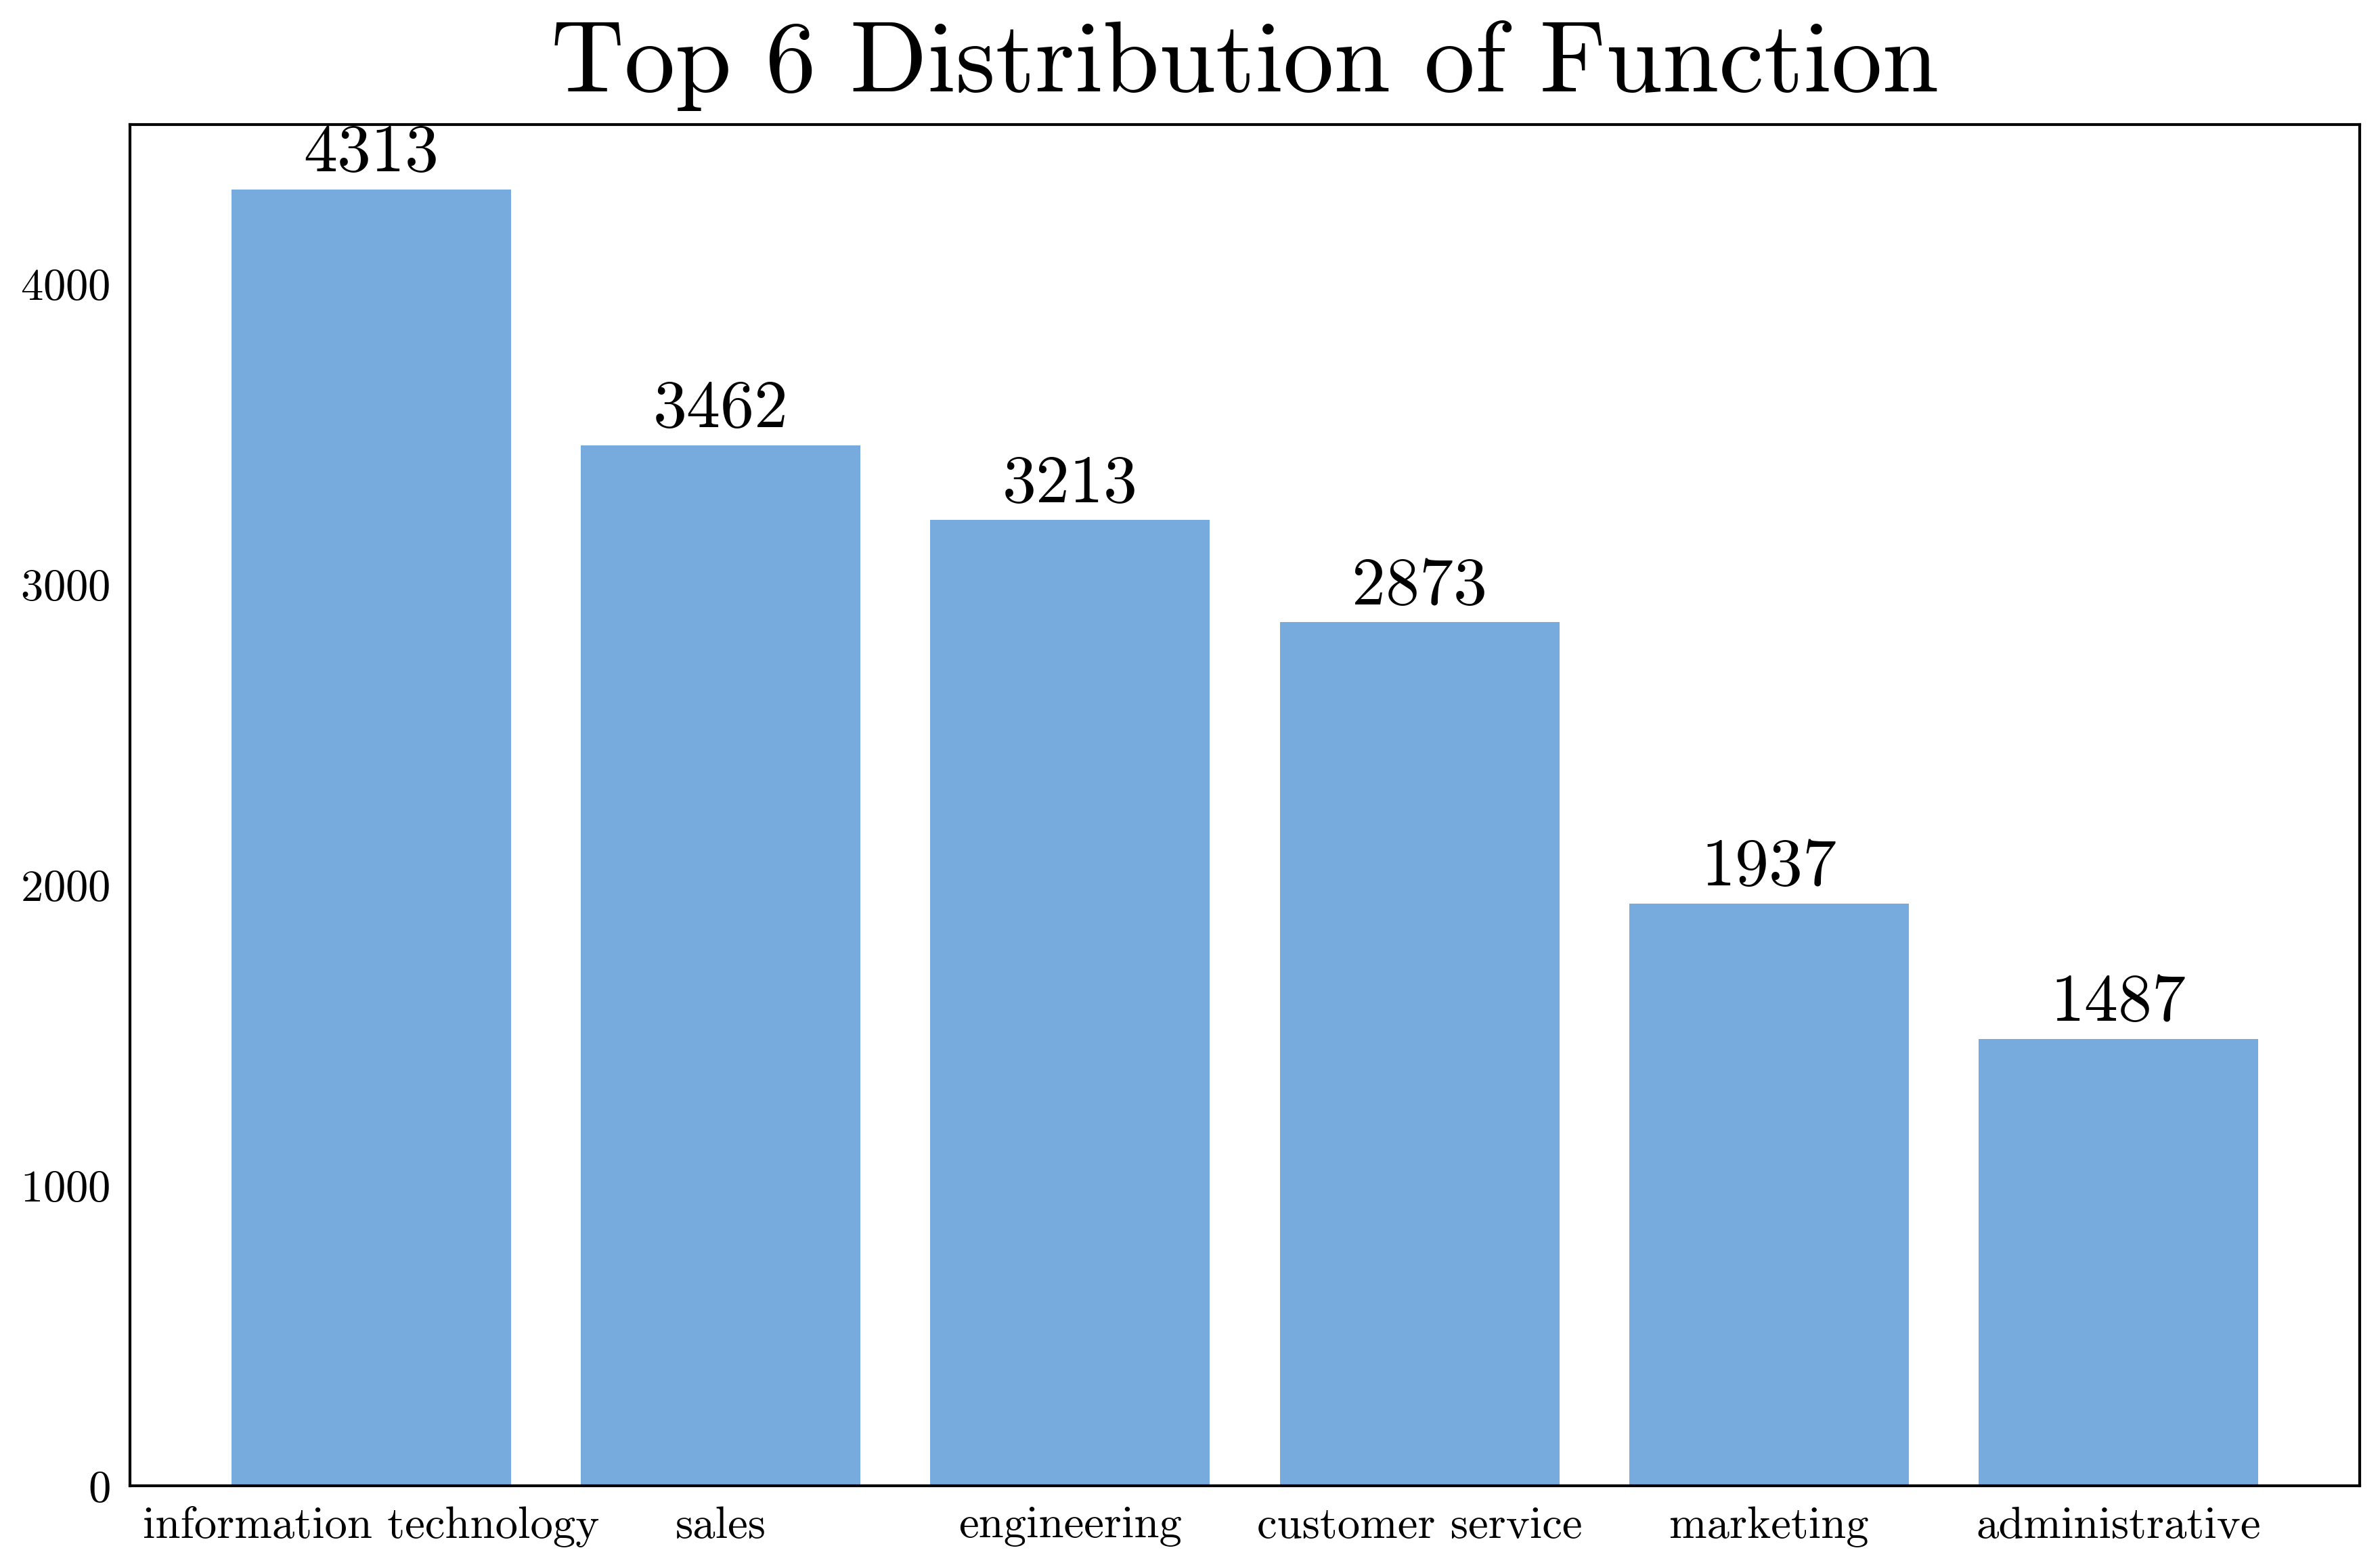

In [76]:
function = df["function"].value_counts()[:6]
labels = function.index 
values = function.values

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    ax.set_title("Top 6 Distribution of Function", fontsize=18)
    plt.tight_layout()
    plt.show()

In [1]:
import os
import joblib

model_dir = "../app/models/fusion-models"

models = {}
for i in range(1, 9):
    name = f"m{i}"
    path = os.path.join(model_dir, f"{name}.joblib")
    models[name] = joblib.load(path)

In [42]:
from sklearn.model_selection import train_test_split

inputs = joblib.load(PROCESSED_DATA_DIR / "inputs.joblib")
target = joblib.load(PROCESSED_DATA_DIR / "target.joblib")
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=42, stratify=target)
y_train.value_counts()
# zero_indices = y_test[y_test == 0].index[0:20]
# y_test.loc[zero_indices] = 1

fraudulent
0    12632
1     8452
Name: count, dtype: int64

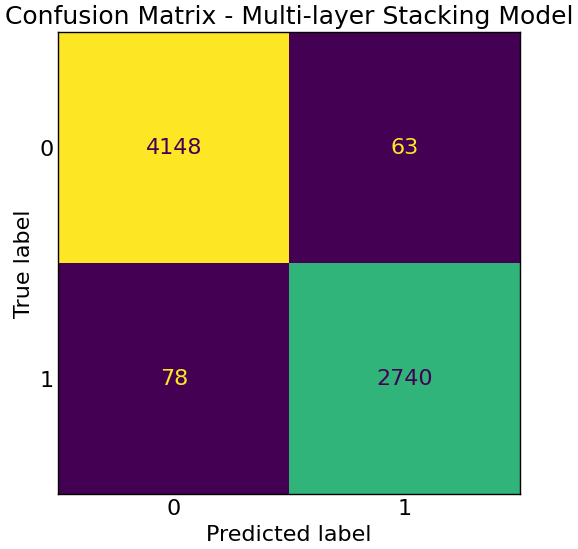

In [54]:
import joblib

multi_layer = joblib.load("../app/models/fusion-models/m8.joblib")
y_pred = multi_layer.predict(X_test)

# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, values_format="d", colorbar=False, text_kw={"fontsize": 16})
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax.set_title("Confusion Matrix - Multi-layer Stacking Model", fontsize=18)
plt.show()

## 模型分析

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

test_sizes = np.linspace(0.1, 0.9, 9)
accuracies = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        inputs, target, test_size=test_size, random_state=42
    )
    clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        (
            'LogisticRegression', 
            LogisticRegression(random_state=42)
        )
    ],
    # memory="cache",
    verbose=True,
)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(test_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel("test data rate")
plt.ylabel("Accuracy")
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
plt.show()


NameError: name 'inputs' is not defined

In [23]:
data = {
    "Model": [
        "$\mathbf{M}_1$",
        "$\mathbf{M}_2$",
        "$\mathbf{M}_3$",
        "$\mathbf{M}_4$",
        "$\mathbf{M}_5$",
        "$\mathbf{M}_6$",
        "$\mathbf{M}_7$",
        "$\mathbf{M}_8$",
        "$\mathbf{B}_1$",
        "$\mathbf{B}_2$",
        "$\mathbf{B}_3$",
    ],
    "Kappa": [
        0.9373,
        0.9384,
        0.9393,
        0.9499,
        0.9619,
        0.9496,
        0.9575,
        0.9582,
        0.9347,
        0.9155,
        0.9523,
    ],
    "Recall": [
        0.9396,
        0.9358,
        0.9368,
        0.9510,
        0.9620,
        0.9528,
        0.9645,
        0.9723,
        0.9397,
        0.9201,
        0.9525,
    ],
    "AUC": [
        0.9651,
        0.9649,
        0.9654,
        0.9719,
        0.9785,
        0.9713,
        0.9772,
        0.9794,
        0.9604,
        0.9532,
        0.9731,
    ],
    "Runtime_s": [
        20.4178,
        18.0452,
        17.5207,
        17.0690,
        0.0125,
        88.8562,
        89.2888,
        178.1434,
        5.0057,
        8.4413,
        9.1990,
    ],
}

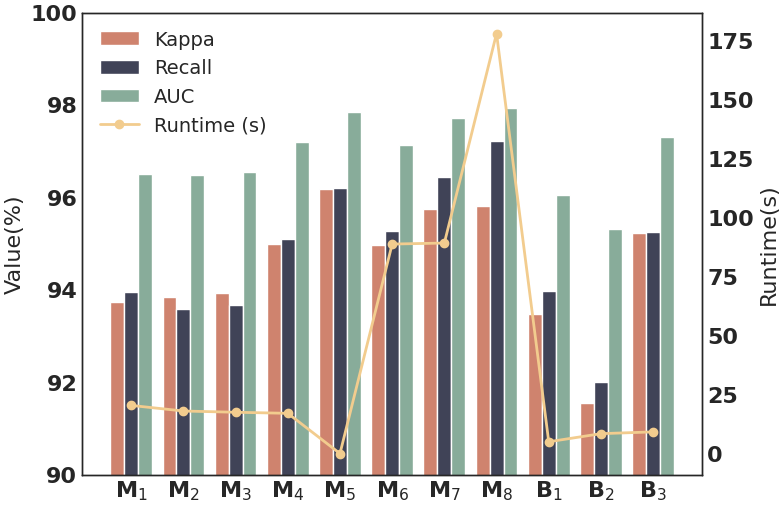

In [24]:
df = pd.DataFrame(data)
df["Kappa"] = df["Kappa"] * 100
df["Recall"] = df["Recall"] * 100
df["AUC"] = df["AUC"] * 100
df_long = pd.melt(
    df,
    id_vars=["Model"],
    value_vars=["Kappa", "Recall", "AUC"],
    var_name="Metric",
    value_name="Value",
)
fig, ax = plt.subplots(figsize=(8, 6))
bar_palette = [
    (223/255, 122/255, 94/255),
    (60/255, 64/255, 91/255),
    (130/255, 178/255, 154/255),
]
sns.barplot(
    data=df_long,
    x="Model",
    y="Value",
    hue="Metric",
    palette=bar_palette,
    ax=ax,
    width=0.8,
)
ax.set_ylim(90, 100)
ax.set_xlabel("")
for label in ax.get_yticklabels():
    label.set_fontweight("bold")
ax.set_ylabel("Value(%)", fontsize=16)
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)
ax.tick_params(axis="y", length=0)
ax1 = ax.twinx()
ax1.plot(
    df["Model"],
    df["Runtime_s"],
    color="#f2cc8e",
    marker="o",
    linestyle="-",
    linewidth=2,
    label="Runtime (s)",
)
ax1.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=False,
)
ax1.set_ylabel("Runtime(s)", fontsize=16)
ax1.tick_params(axis="y", length=0)

for label in ax1.get_yticklabels():
    label.set_fontweight("bold")
ax.legend_.remove()
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper left", fontsize=14)
ax.yaxis.set_ticks_position("none")
plt.show()

In [57]:
df.columns

Index(['location', 'employment_type', 'industry', 'department',
       'telecommuting', 'has_company_logo', 'has_questions',
       'required_experience', 'required_education', 'function', 'text',
       'salary', 'text_length', 'fraudulent'],
      dtype='object')

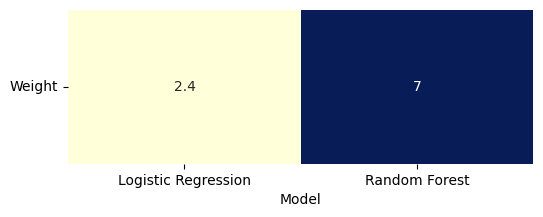